#### Let's dig in!

#### Give me a thumbs up if you liked it! And I'm always open to suggestions!

##### Some key insights from this dataset is as follows:
    
   * Most number of deaths have occured in 3rd week!
   * Drowning is the primary reason for cause of death.
   * African countries are most effected in terms of number of deaths.
   * Syria and Mexico are most effected.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline

In [2]:
data = pd.read_csv("../input/MissingMigrantsProject.csv", encoding = "cp437")
data.head()

,id,cause_of_death,region_origin,affected_nationality,missing,dead,incident_region,date,source,reliability,lat,lon
0,1,Presumed drowning,Middle East,Iraq,1.0,1.0,Mediterranean,05/11/2015,IOM Greece,Verified,36.89150,27.287700
1,3,Fell from train,Central America & Mexico,Honduras,NaN,1.0,Central America incl. Mexico,03/11/2015,La Jornada,Partially Verified,15.95640,-93.663100
2,4,Presumed drowning,Middle East,NaN,NaN,1.0,Mediterranean,03/11/2015,Hellenic Coast Guard,Verified,36.50439,27.363253
3,6,Drowning,MENA,NaN,6.0,4.0,Mediterranean,01/11/2015,Reuters,Partially Verified,37.28560,27.086600
4,7,Vehicle accident,South East Asia,Cambodia,NaN,4.0,Southeast Asia,01/11/2015,Phnom Penh Post,Partially Verified,13.36110,100.985000


#### Data sanity check. 

In [3]:
data.isnull().sum()

id                         0
cause_of_death           203
region_origin            443
affected_nationality    1575
missing                 2149
dead                     102
incident_region           10
date                       9
source                     7
reliability              324
lat                        4
lon                        4
dtype: int64

#### Creating date features.

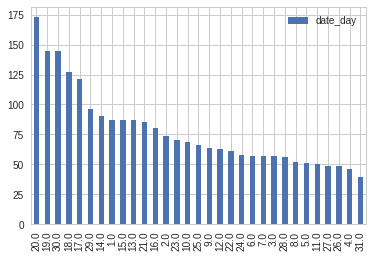

In [4]:
#Date features. 
data['date_day'] = pd.DatetimeIndex(data['date']).day
data['date_month'] = pd.DatetimeIndex(data['date']).month
data['date_year'] = pd.DatetimeIndex(data['date']).year

data['date_day'].value_counts().to_frame().plot(kind = "bar")

##### Inference : There isn't seem to be a strong pattern here. But people seem to move more during 17th, 18th, 19th, 20th. 

### Can we find any pattern in day of the week?

In [5]:
#That is 
# Monday - 0
# Tuesday - 1 etc. 
data['date_dayofweek'] = pd.DatetimeIndex(data['date']).dayofweek

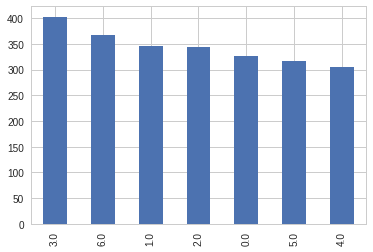

In [6]:
data['date_dayofweek'].value_counts().plot(kind = "bar")

### Can we find any pattern in months?

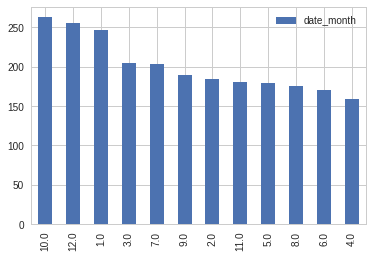

In [7]:
data['date_month'].value_counts().to_frame().plot(kind = "bar")

In [8]:
print(data['date_day'].isnull().sum())
print(data['date_day'].value_counts().head(5))




9
20.0    173
19.0    145
30.0    145
18.0    127
17.0    121
Name: date_day, dtype: int64


In [9]:
#subsituting with 20
data['date_day'] = data['date_day'].fillna(20.0)
print(data['date_day'].isnull().sum())

0


### Can we find any pattern in week number?

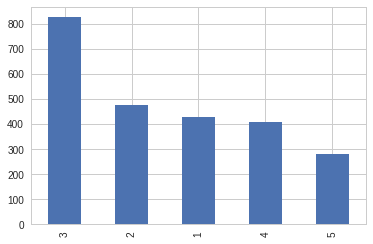

In [10]:
import math
data['week_number'] = [math.ceil(datum/7) for datum in data['date_day']]
data['week_number'].value_counts().plot(kind = 'bar')

#### Inference: Looks like we found one. It looks like week 3 is when people move more to cross borders. 

## Cause of Death and substitution. 

In [11]:
#Lets do some data replacement. 
data['cause_of_death'] = data['cause_of_death'].fillna("Drowning")
data['cause_of_death'] = list(map(lambda string: string.lower(), data['cause_of_death']))
data['cause_of_death'].unique()

array(['presumed drowning', 'fell from train', 'drowning',
       'vehicle accident',
       'died of unknown cause in hospital shortly after rescue',
       'exposure. died upon entry to refugee camp.', 'suffocation',
       'hit by vehicle', 'hit by train', 'shot', 'hi by truck',
       'crushed to death', 'drowning. boat collided with ferry',
       'electrocution', 'unknown, torture involved', 'train accident',
       'drowning, asphyxiation',
       'burns from cooking gas explosion in connection house in libya',
       'drowning after being thrown overboard by other passengers',
       'hypothermia',
       'unclear, possibly related to earlier beating by truck driver',
       'severe exhaustion and dehydration', 'beating/shot by traffickers',
       'starvation', 'unknown (found on motorway)',
       'burned to death hiding in truck', 'hit by truck',
       'drowning due to forced disembarcation', 'hyperthermia, starvation',
       'hyperthermia', 'tortured to death',
       'de

In [12]:
data['cause_of_death'].value_counts()

drowning                                                                                                                                        729
unknown (skeletal remains)                                                                                                                      211
presumed drowning                                                                                                                               146
sickness_and_lack_of_access_to_medicines                                                                                                        120
vehicle_accident                                                                                                                                 93
shot                                                                                                                                             82
shot_or_stabbed                                                                                                 

#### That's a lot of classes. Let's reduce them. 

In [13]:
#Lets lessen the classes for ease. 
import re

def deathcause_replacement():
    global data
    data.loc[data['cause_of_death'].str.contains('sickness'), 'cause_of_death'] = 'sickness'
    data.loc[data['cause_of_death'].str.contains('harsh_weather'), 'cause_of_death'] = 'harsh_weather'
    data.loc[data['cause_of_death'].str.contains('unknown|unknow|north africa'), 'cause_of_death'] = 'unknown'
    data.loc[data['cause_of_death'].str.contains('starvation|dehydration'), 'cause_of_death'] = 'starvation'
    data.loc[data['cause_of_death'].str.contains('drowning|pulmonary|respiratory|lung|bronchial|pneumonia'), 'cause_of_death'] = 'drowning'
    data.loc[data['cause_of_death'].str.contains('hyperthermia'), 'cause_of_death'] = 'hypothermia'
    data.loc[data['cause_of_death'].str.contains('hypothermia'), 'cause_of_death'] = 'hypothermia'
    data.loc[data['cause_of_death'].str.contains('asphyxiation|suffocation'), 'cause_of_death'] = 'asphyxiation'
    data.loc[data['cause_of_death'].str.contains('train|bus|vehicle|truck|boat|car|road|van'), 'cause_of_death'] = 'vehicle accident'
    data.loc[data['cause_of_death'].str.contains('murder|stab|shot|violent|blunt force|violence|beat-up|fight|murdured|death'), 'cause_of_death'] = 'murder'
    data.loc[data['cause_of_death'].str.contains('crushed to death|crush'), 'cause_of_death'] = 'crushed'
    data.loc[data['cause_of_death'].str.contains('harsh conditions|harsh_weather'), 'cause_of_death'] = 'harsh conditions'
    data.loc[data['cause_of_death'].str.contains('diabetic|heart attack|sickness|meningitis|virus|cancer|bleeding|insuline|inhalation'), 'cause_of_death'] = 'health condition'
    data.loc[data['cause_of_death'].str.contains('electrocution'), 'cause_of_death'] = 'electrocution'

In [14]:
deathcause_replacement()

data['cause_of_death'].unique()

array(['drowning', 'vehicle accident', 'unknown',
       'exposure. died upon entry to refugee camp.', 'asphyxiation',
       'murder', 'electrocution',
       'burns from cooking gas explosion in connection house in libya',
       'hypothermia', 'starvation', 'fell from wall', 'found hanged',
       'mixed', 'plane stowaway', 'head injury', 'killed',
       'health condition', 'crushed', 'attacked by hippopotamus',
       'landmine', 'exposure', 'assaulted by smugglers', 'poison',
       'presumed exposure', 'head injury from fall', 'hunger, fatigue',
       'suicide', 'harsh conditions', 'other', 'pending', 'various',
       'renal insufficiency',
       'pima county (see spreadsheet for exact location)',
       'tekeze river, near himora, ethiopia', 'fuel burns',
       'fall from cliff'], dtype=object)

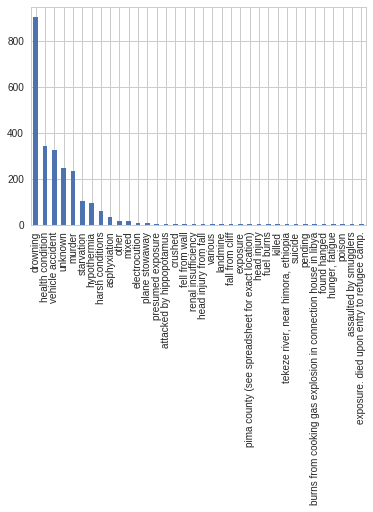

In [15]:
data['cause_of_death'].value_counts().plot(kind = "bar")

#### Inference: Looks like drowning is the primary reason for death. 

In [16]:
inspect = data['cause_of_death'].value_counts().to_frame().reset_index()
inspect.columns = ['cause_of_death', "death_count"]

name_list = inspect.loc[inspect['death_count'] >5 ]['cause_of_death'].tolist()

In [17]:
data = data.loc[data['cause_of_death'].isin(name_list)]

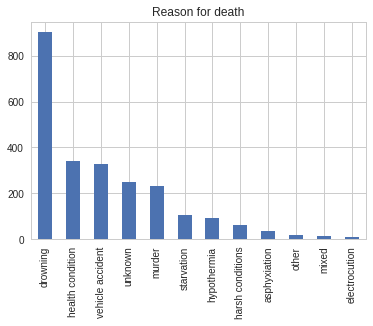

In [18]:
data['cause_of_death'].value_counts().plot(kind = "bar", title = "Reason for death")

## Can we do something with latitude and longitude values?

In [19]:
[np.mean(data['lat']), np.mean(data['lon'])]

[26.90246600197567, -13.802713980602439]

In [20]:
data['lon'] = data['lon'].fillna(np.mean(data['lon']))    #data['lon'][~np.isnan(data['lon'])].mean()
data['lat'] = data['lat'].fillna(np.mean(data['lat']))    #data['lon'][~np.isnan(data['lon'])].mean()

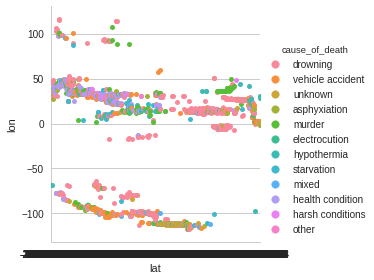

In [21]:
sns.factorplot(x = "lat", y = "lon", hue = "cause_of_death", kind = "swarm", data = data)

#### I tried to plot them on a map. But I wasn't able to. Would love your suggestions here. 

## Who are more effected in terms of region?

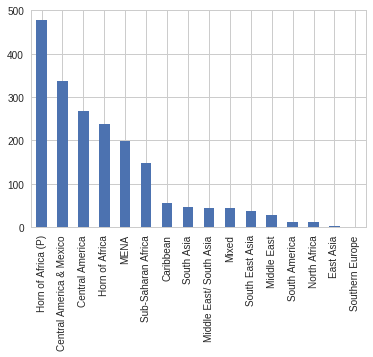

In [22]:
data['region_origin'].value_counts().plot(kind = "bar")

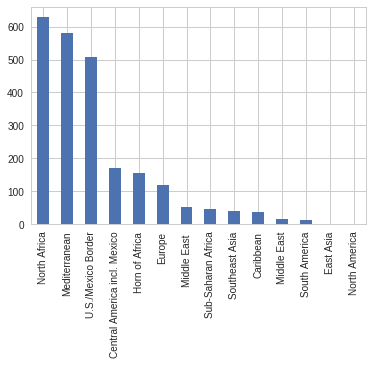

In [23]:
data['incident_region'].value_counts().plot(kind = "bar")

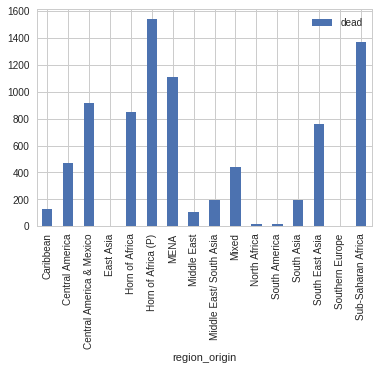

In [24]:
data.groupby('region_origin')['dead'].sum().to_frame().plot(kind = "bar")

### I see a lot of different variants of Africa. Let's combine all of them!

In [25]:
#Lets change it a bit to make it more concrete!
data['region_origin'].unique()

array(['Middle East', 'Central America & Mexico', 'MENA',
       'South East Asia', nan, 'South Asia', 'Middle East/ South Asia',
       'Sub-Saharan Africa', 'Horn of Africa', 'Caribbean',
       'South America', 'East Asia', 'Central America', 'North Africa',
       'Southern Europe', 'Mixed', 'Horn of Africa (P)'], dtype=object)

In [26]:
data['region_origin'] = data['region_origin'].fillna('Africa')

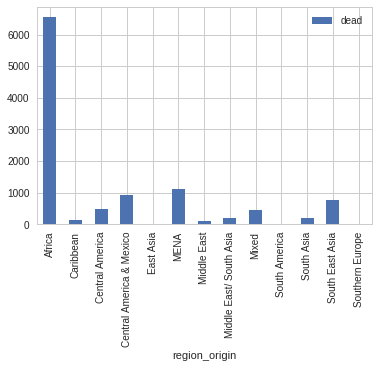

In [27]:
data.loc[data['region_origin'].str.contains('Africa'), 'region_origin'] = 'Africa'
data.groupby('region_origin')['dead'].sum().to_frame().plot(kind = "bar")

In [28]:
data.groupby('region_origin')['dead'].sum().to_frame()


,dead
region_origin,
Africa,6547.0
Caribbean,130.0
Central America,471.0
Central America & Mexico,918.0
East Asia,5.0
MENA,1108.0
Middle East,104.0
Middle East/ South Asia,197.0
Mixed,443.0


#### *That's staggering! Of all the deaths in this dataset 60% of the deaths were from Africa!*

### Assuming missing people are dead!

In [29]:
#Let's combine missing and dead. 
data['missing'].value_counts().head(10)

1.0     26
2.0     23
3.0     20
4.0     13
6.0     11
20.0     9
9.0      9
8.0      9
7.0      8
10.0     6
Name: missing, dtype: int64

In [30]:
data['missing'] = data['missing'].fillna(1)
data['missing_and_dead'] = data['missing'] + data['dead']

data['missing_and_dead'].value_counts().head(10)

2.0     1338
3.0      249
4.0      162
5.0       71
6.0       67
7.0       54
8.0       32
9.0       31
10.0      22
11.0      20
Name: missing_and_dead, dtype: int64

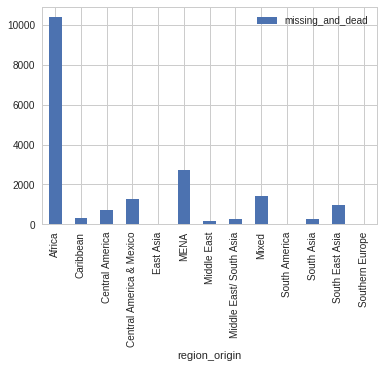

In [31]:
data.groupby('region_origin')['missing_and_dead'].sum().to_frame().plot(kind = "bar", stacked = True)

### Which country is more affected?

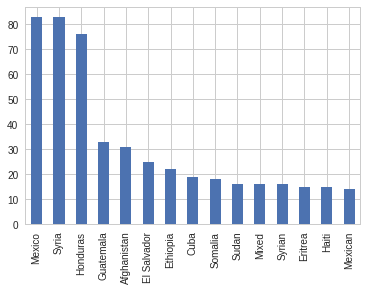

In [32]:
data['affected_nationality'].value_counts().head(15).plot(kind = "bar")